# Spulen

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [31]:
U = np.array([-5.14,-4.63,-4.11,-3.601,-3.088,-2.573,-2.058,-1.545,-1.030,-0.514,0.4e-3,0.515,1.030,1.546,2.064,2.579,3.094,3.609,4.12,4.635,5.15])
I = np.array([-3.01,-2.70,-2.39,-2.09,-1.79,-1.49,-1.19,-0.89,-0.59,-0.30,0.0,0.30,0.60,0.89,1.20,1.50,1.79,2.09,2.39,2.68,2.98])

# Als Fehler wird noch Genauigkeit der Multimeter genommen...
# Fehler noch aus Datenblatt...
Uerr = np.array([0.01 for i in range(3)] + [0.001 for i in range(15)] + [0.01 for i in range(3)])
Ierr = np.array([0.01 for i in range(len(I))])

def lin(x,m,b):
    return m*x+b

0.5806117775757463
0.0005623827674162643
0.9999910872828145 1.3858548955873368e-46


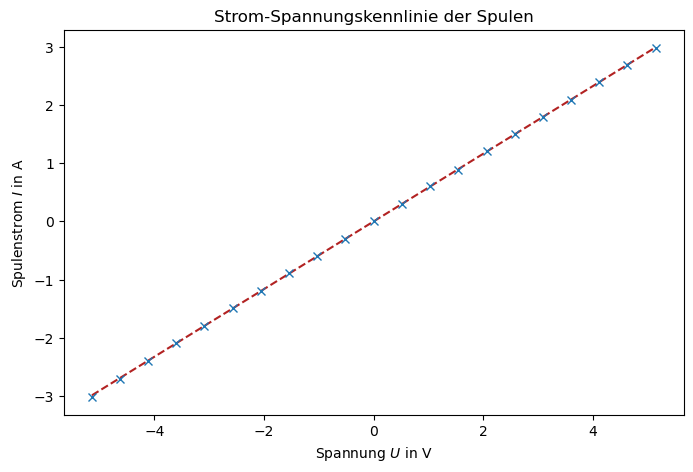

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

slope, intercept, rvalue, pvalue, slope_std = linregress(U,I)

print(slope)
print(slope_std)

print(rvalue,pvalue)

ax.errorbar(U,I,yerr=Ierr,linestyle='',marker='x')
ax.plot(U,lin(U,slope,intercept),linestyle='--',color='firebrick')
ax.set_xlabel('Spannung $U$ in V')
ax.set_ylabel('Spulenstrom $I$ in A')
plt.title('Strom-Spannungskennlinie der Spulen')
plt.savefig('figures/strom_spannungs_kennlinie_spulen.pdf')